# Whatsapp Chat Data Analysis

#### Author: Rahil Amit Shah

<br>

<br>

#### Introduction

Over here I analyze the whatsapp chat data that I found online, and discuss my insights. I have made this project as beginner friendly as possible. Coding such that the reader gets the clear understanding, commenting the code on the some tough portions. All the insights and comments that I make here are not to hurt anyone they are my just personal suggestions. Some of my insights may be biased and hence, I encourage the reader to correct me wherever I am wrong.

Also, I have made this as visual as possible. Making it very attractive and understandable. It goes after the popular saying, "A picture is more than a thousand words". So, without getting late let's get started

<br>

### Contents

1. **Installing libraies**
2. **Processing the data** 
3. **Getting the feel of the data (superficially)**
4. **Overall frequency of messages**
5. **Top 10 active days**
6. **Peak usage time**
7. **Top 5 active users**
8. **Sleep cycle of most active users**
9. **Finding the owls**
10. **Most common words**
11. **Conclusion**
12. **What next**

## 1. Installing some required libraries

In [1]:
!pip install emoji --upgrade
!pip install wordcloud
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from collections import Counter

*****

## 2. Processing the data

In [2]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df


The above code defines a function which converts the **raw** whatsapp chat data into **pandas dataframe**

In [3]:
filename = r"C:\Users\Rahil\Desktop\College\Resume\projects\whatsapp_chat_analysis\whats_data.txt"
df = rawToDf(filename, '12hr')

___

## 3. Getting the general feel of the data

Now we try to get the feel of the data.

In [4]:
df

,date_time,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...
...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup


In [5]:
df.shape

(13655, 3)

So we understand that the overall shape of the dataframe is 13655 rows and 3 columns

In [6]:
images = df[df['message'] == "<Media omitted> "]
images.shape

(687, 3)

We understand that there are 687 rows containing images. These are of no use in this analysis as I have not processed images here. One can even do this and try to understand the pattern behind them

In [7]:
df['user'].unique()

array(['group_notification', '+91 96536 93868',
       'Dheeraj Lalwani (TSEC, CS)', '+91 99201 75875', '+91 95949 08570',
       '+91 79778 76844', '+91 90499 38860', 'Tanay Kamath (TSEC, CS)',
       'Saket (TSEC, CS)', '+91 77568 95072', 'Rohit Pathak (TSEC, CS)',
       '+91 75078 05454', 'Darshan Rander (TSEC, IT)', '+91 79774 68083',
       '+91 70394 60876', '+91 96191 55044', '+91 90678 93300',
       'Mohit Varma (TSEC, CS)', '+91 79770 56210',
       'Chirag Sharma (TSEC, CS)', 'Vivek Iyer (TSEC, Biomed)',
       'Tushar Nankani', '+91 81696 22410', '+91 89764 07509',
       '+91 78758 66747', 'Ankit (TSEC, CS)', '+91 86556 33169',
       '+91 76663 28147', '+91 88284 70904', '+91 97698 67348',
       'Vivek (TSEC, CS)', 'Hardik Raheja (TSEC, CS)', '+91 91680 38866',
       'Pranay Thakur (TSEC, CS)', 'Mittul Dasani (TSEC, CS)',
       'Kartik Soneji (TSEC, CS)', '+91 77180 43697', '+91 99676 84479',
       'Shreya (TSEC, IT)', '+91 96190 16721', '+91 89833 85127',
       '+9

Many people are there in this group

Let us find the number of users in this group

In [8]:
len(df['user'].unique())

155

So, we find that there are in total 155 people who have texted in the group

In [9]:
df.drop(images.index, inplace=True)

Over here we deleted the images as they are no of no use for us currently. As in this project we not going to analyze images. And reseting the index

In [10]:
df.reset_index(inplace=True, drop=True)

In [11]:
df.shape

(12968, 3)

So, we get 12,968 rows of data for the analysis after cleaning and processing the data 

Now, we got a superficial feel of the data, let's dive deeper to analyze the data.

 Let's see what was the ***starting*** and the ***end point*** of the data

In [12]:
print(df['date_time'].head(1) )
print(df['date_time'].tail(1))

0   2020-01-26 16:19:00
Name: date_time, dtype: datetime64[ns]
12967   2020-10-02 10:13:00
Name: date_time, dtype: datetime64[ns]


So, the first message we have here was dated **26th January 2020** and the last message was dated on **10th February 2020**

***

## 4. Overall frequency of total messages on the group

In [13]:
df2 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!


# Adding some extra colummns of data using date and time provided by the whatsApp
df2['day'] = df2['date_time'].dt.strftime('%a')
df2['month'] = df2['date_time'].dt.strftime('%b')
df2['date'] = df2['date_time'].apply(lambda x: x.date())


df2['message_count'] = [1] * df2.shape[0]      # adding extra helper column --> message_count.

df2= df2.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df2

,date,message_count
0,2020-01-24,1
1,2020-01-26,105
2,2020-01-27,79
3,2020-01-28,120
4,2020-01-29,106
...,...,...
236,2020-09-28,135
237,2020-09-29,46
238,2020-09-30,165
239,2020-10-01,85


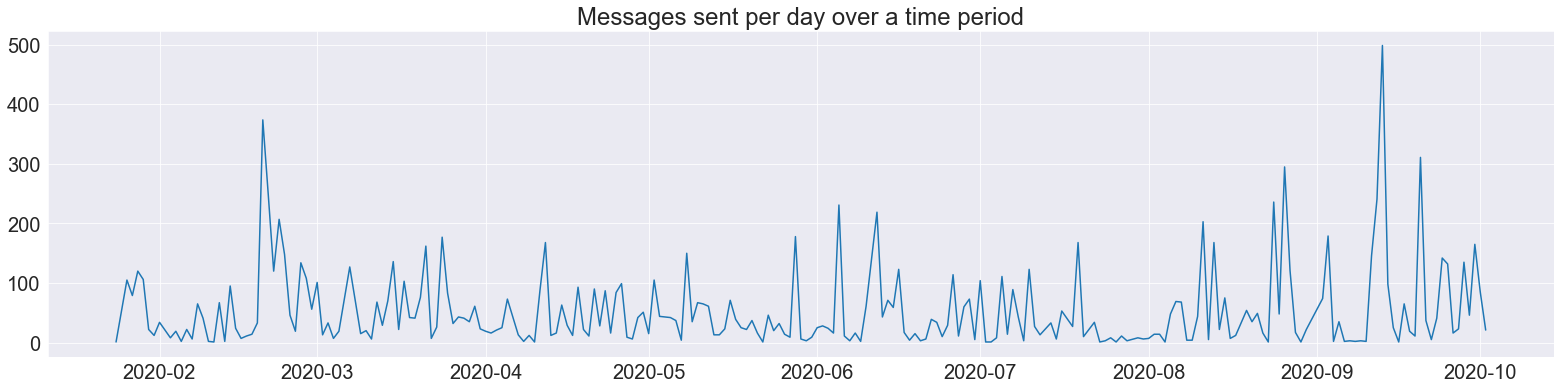

In [14]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`


# A basic plot
plt.plot(df2.date, df2.message_count)
plt.title('Messages sent per day over a time period');


So, we see many crests and troughs here which is expected as some days of the month will have a large amount of messages while others will be small. We can use the pareto principle or popularly called as 20/80 principle. It suggests that 20% of the days will be contributing to 80% of the total messages. Which seems to be quite true here as well. As we see 2 hughe peaks while others have very less contribution to the total messages.

***

## 5. Top 10 active days

Here, we find out the **top 10** active days (days having the highest number of messages) of the year 2020. 

In [15]:
top_10_days = df2.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top_10_days.reset_index(inplace=True)           # reset index in order.
top_10_days.drop(columns="index", inplace=True) # dropping original indices.
top_10_days

,date,message_count
0,2020-09-13,499
1,2020-02-20,374
2,2020-09-20,311
3,2020-08-26,295
4,2020-02-21,249
5,2020-09-12,241
6,2020-08-24,236
7,2020-06-05,231
8,2020-06-12,219
9,2020-02-23,207


C:\Users\Rahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


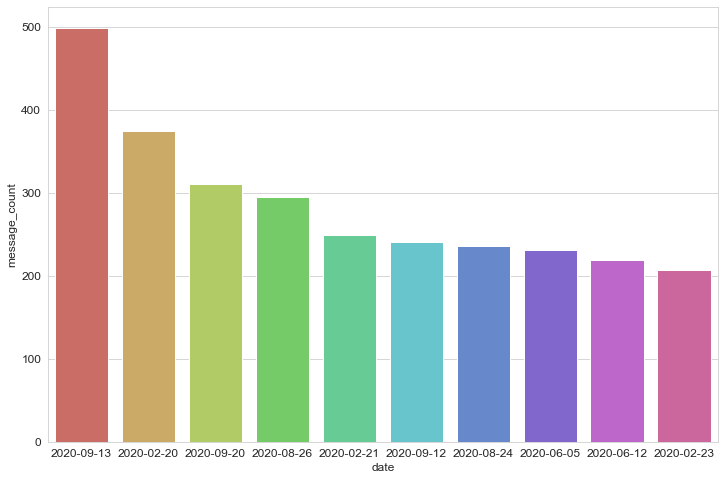

In [16]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(top_10_days.date, top_10_days.message_count, palette="hls");


We understood here the top 10 days and the number of messages during those days

We find that 13|9|2020 was the date having the highest number of text messages and which was around 500

***

## 6. Peak Usage Time

We need to now convert the date and time from the data to time and use it for analysis. For this we will use date time library of python to analyze it.

In [17]:
df3 = df.copy()
df3['hour'] = pd.DatetimeIndex(df.date_time).hour

In [18]:
df3

,date_time,user,message,hour
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,16
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",20
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,16
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,16
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,16
...,...,...,...,...
12963,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,2
12964,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,2
12965,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,2
12966,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,2


Now we find that the data now contains the hour column which could further plotted as a countplot to understand the distribution of messages over the time of the day

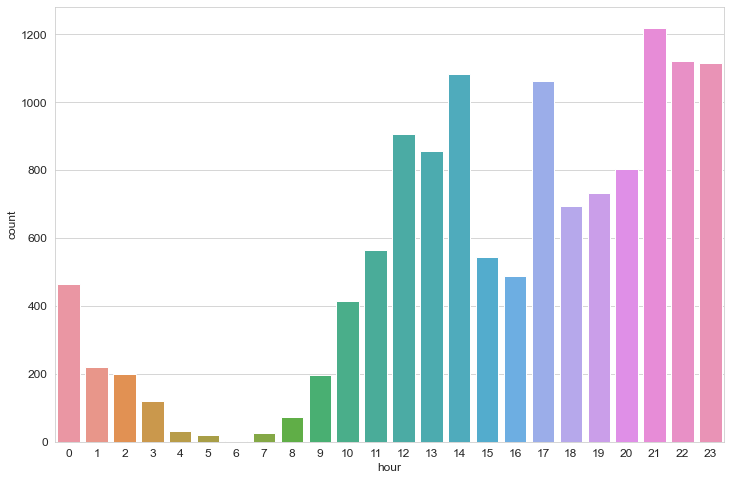

In [19]:
sns.countplot(x ='hour', data = df3);

We see that the peak time is 9 pm. That must be because in the morning people have classes and other work to do. Hence, they don't find time to chat. But at night they are releatively free and can chat. Also, the decay after 9 pm suggests that people get sleepy after as I do feel sleepy many a times after 9 pm or it can be because there are assignments and exams alway round the corner in engineering colleges. Hence, people might go to study after 9 pm.

The least number of messages are at 6 am. That is likely because most college students rarely wake up early and even if some wakeup, they are not as active on the group as there are other chores that need to be completed in the morning. There is a minima around 1 am to 9 am suggesting the sleeping time of most of the people in the group.

***

## 7. Top 5 Active Users

First let's see how many people haven't posted any message in this group

In [20]:
# Total number of people who have sent at least one message on the group;
print("Total number of people who have sent at least one message on the group are:",(len(df.user.unique()) - 1))   

print("Number of people who haven't sent even a single message on the group are:",(237 - len(df.user.unique()) - 1))

Total number of people who have sent at least one message on the group are: 152
Number of people who haven't sent even a single message on the group are: 83


237 is the total number of the people in the group. And we subtracted that with the number of people who have sent atleast one message to get the people who haven't sent any message.

We see that **83 haven't sent any single message in the group!!** Quite astonishing fact.

Now we find the top 5 active users in the group. 

Now we try to plot and vizualize the data

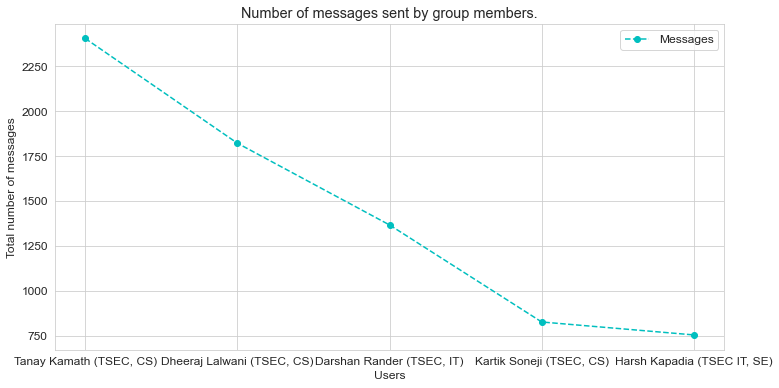

In [21]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(5).reset_index()
top10df


# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))


# plt.plot(top10df.initials, top10df.message, marker='o', ls='--', c='cyan')

# BETTER IMPLEMENTATION using the `fmt` argument;
plt.plot(top10df.user, top10df.message, 'o--c')  


# Labels and Title 
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members.")
plt.legend(['Messages']);

# Saving the plots
# plt.savefig('msg_plots.svg', format = 'svg')

This gives a deep understanding of how the message an intutive understanding of how the message distribution has been among the top 5 messengers. And we see the highest to be more than 22500 messages. And when it comes to the 5th person it is just around 750.

Recently I have been reading about some superstars in field of programming, finance. And this is a similar plot as we see there. We see the high performars perform very high while the average is just about nothing in front of them.

And this curve is true for almost all the measurable quantities, even the salaries of employees in a company, performance of top executives, etc. I maybe biased and wrong here. Hence, I ask the people who are reading this analysis to correct me give some mathamatical proofs so that I can improve on the conclusions that I have made.

### Let's understand how the distribution of messages takes place on the weekdays among the top 5 messengers

In [22]:
df4 = df.copy()

In [23]:
df4.sample(10)

,date_time,user,message
11080,2020-09-12 22:50:00,+91 70219 80066,But if we initialize variable inside else bloc...
1733,2020-02-23 12:21:00,+91 79770 56210,Any suggestions??
8482,2020-07-18 17:34:00,group_notification,+91 99203 34360 joined using this group's invi...
5110,2020-04-26 19:03:00,+91 99201 75875,Just use Visual Studio instead of Visual Studi...
12194,2020-09-23 14:20:00,+91 75078 05454,try this
7545,2020-06-25 23:37:00,"Harsh Kapadia (TSEC IT, SE)",Definitely agree with this! Get started with ...
749,2020-02-14 19:06:00,+91 95949 08570,Put it in another array
5780,2020-05-11 20:26:00,"Kartik Soneji (TSEC, CS)",Why is the exe 23 MB?
10755,2020-09-11 11:07:00,+91 82916 21138,True
2128,2020-02-27 19:36:00,"Tanay Kamath (TSEC, CS)",Arre iska galat meaning aa rha hai


We see there are some empty strings this maybe because it might contain emojis*

We need to introduce now weekdays in the dataframe

In [24]:
df4['weekday'] = df['date_time'].apply(lambda x: x.day_name()) 
# can use day_name or weekday from datetime 

In [25]:
df4['is_weekend'] = df4.weekday.isin(['Sunday', 'Saturday'])

In [26]:
msgs_per_user = df4['user'].value_counts(sort=True)
msgs_per_user

Tanay Kamath (TSEC, CS)        2404
Dheeraj Lalwani (TSEC, CS)     1821
Darshan Rander (TSEC, IT)      1366
Kartik Soneji (TSEC, CS)        826
Harsh Kapadia (TSEC IT, SE)     754
                               ... 
+91 96194 00980                   1
+91 89833 85127                   1
+91 75064 86714                   1
+91 97847 88658                   1
+91 98709 38217                   1
Name: user, Length: 153, dtype: int64

In [27]:
top5_users = msgs_per_user.index.tolist()[:5] # getting the top 5 users
top5_users

['Tanay Kamath (TSEC, CS)',
 'Dheeraj Lalwani (TSEC, CS)',
 'Darshan Rander (TSEC, IT)',
 'Kartik Soneji (TSEC, CS)',
 'Harsh Kapadia (TSEC IT, SE)']

In [28]:
df_top5 = df.copy()
df_top5 = df4[df4.user.isin(top5_users)]
df_top5.head()

,date_time,user,message,weekday,is_weekend
114,2020-01-27 19:31:00,"Dheeraj Lalwani (TSEC, CS)",Alright,Monday,False
115,2020-01-27 19:32:00,"Dheeraj Lalwani (TSEC, CS)",We can make this a trend,Monday,False
117,2020-01-27 19:32:00,"Dheeraj Lalwani (TSEC, CS)",Everyday a new challenge,Monday,False
119,2020-01-27 19:43:00,"Dheeraj Lalwani (TSEC, CS)",Yeah,Monday,False
120,2020-01-27 19:44:00,"Dheeraj Lalwani (TSEC, CS)",Something or the other So that we can build o...,Monday,False


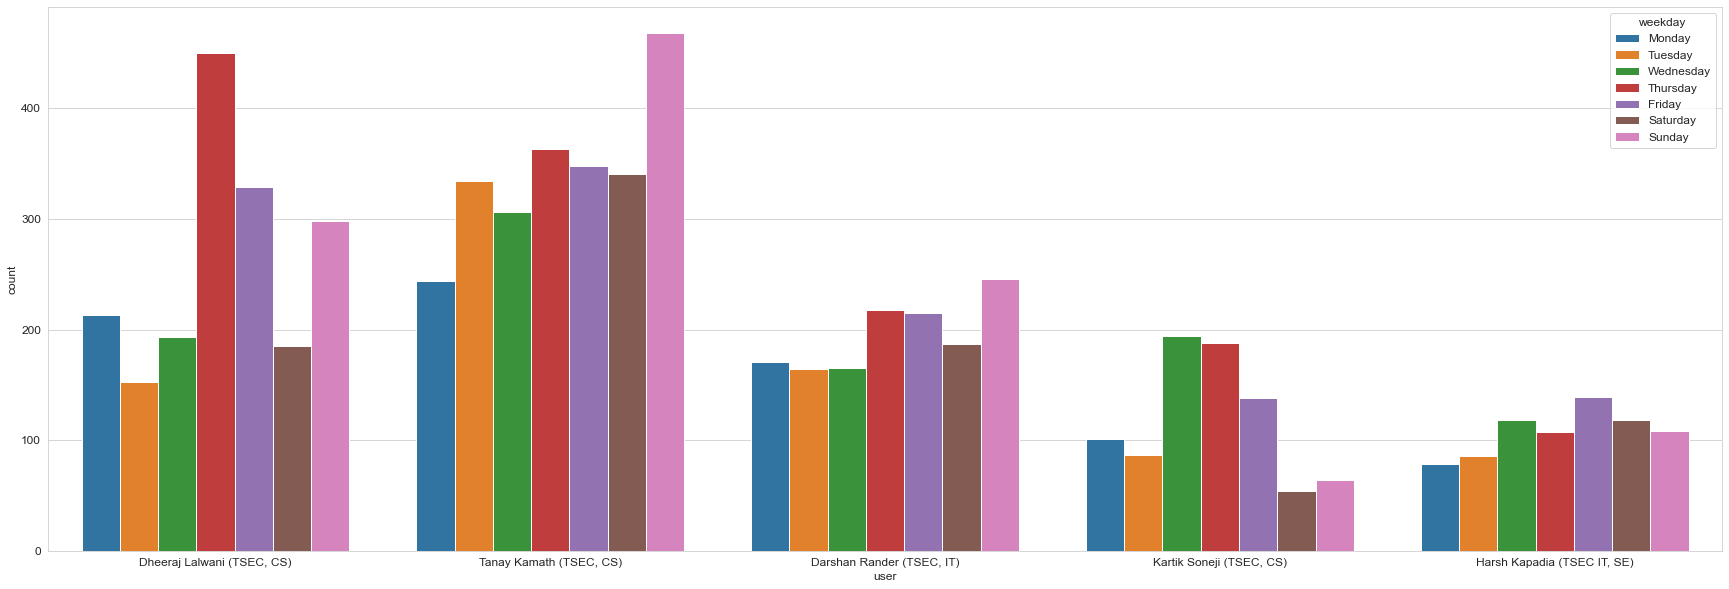

In [29]:
plt.figure(figsize=(30,10))
sns.countplot(x=df_top5['user'], hue="weekday", data=df_top5)
plt.show()

We find that Dheerah's peak occurs at thursdays while Tanay's peak occurs at sunday. Having highest message on sundays is quite understandable but thursday as the highest message day is quite odd.

Maybe it depends on the personal choice of the person or that he may have parties on saturdays and sundays. That's why he may be releatively busy on those days. For better understanding we also need some other data to predict accurately of what might be the reason for the highest messages on thusrsday

***

## 8. Sleep cycle of top 5 users

###### We might ask how does data containg text messages on the whatsapp group may predict sleep cycle?

One explaination could be if one sends a message in the night then he must be awake at that time while he may be assumed asleep otherwise. Ofcourse this can't completely define sleep cycle of any particular person as he might not open whatsApp at night. But it's a good assumption to make, as most people today are highly active on social media and they text atleast one message every hour, so it's a clever assumption to make. But, we still need some more data to completely define the sleep cycle. 

We now take up the two most people who were highly active on whatsapp groups and comment on their sleep cycle.

In [30]:
df7= df.groupby("user")["message"].count().sort_values(ascending=False)
df7.head(2)

user
Tanay Kamath (TSEC, CS)       2404
Dheeraj Lalwani (TSEC, CS)    1821
Name: message, dtype: int64

So, Tanay and Dheeraj are the people who's sleep cycle we would like to comment on

In [31]:
df8 = df[df['user'] == 'Tanay Kamath (TSEC, CS)']

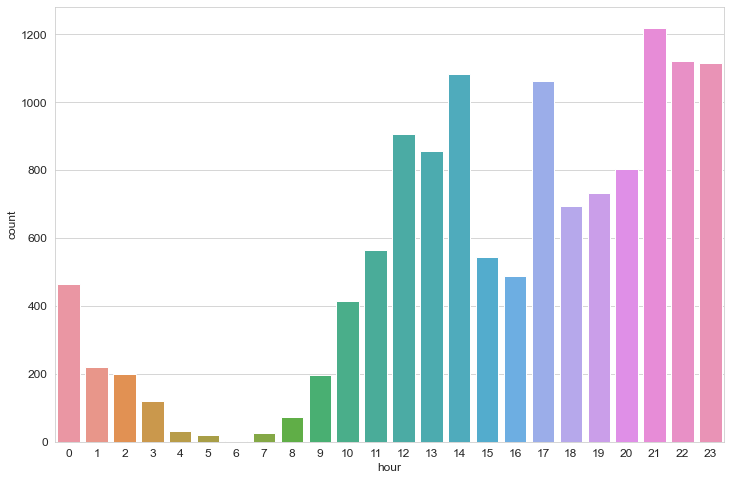

In [32]:
sns.countplot(x='hour', data=df3);

So, we find a minima between 1 am to 9 am. And he has texted very less between this time interval

We, can assume that he must have been asleep between 2am to 9am. Also, we see that his sleep is distributed over the time of 1am to 9am. Since these are also, the less active hours. (Here active means texting)

Similarly we try to analyze Dheeraj's sleep cycle

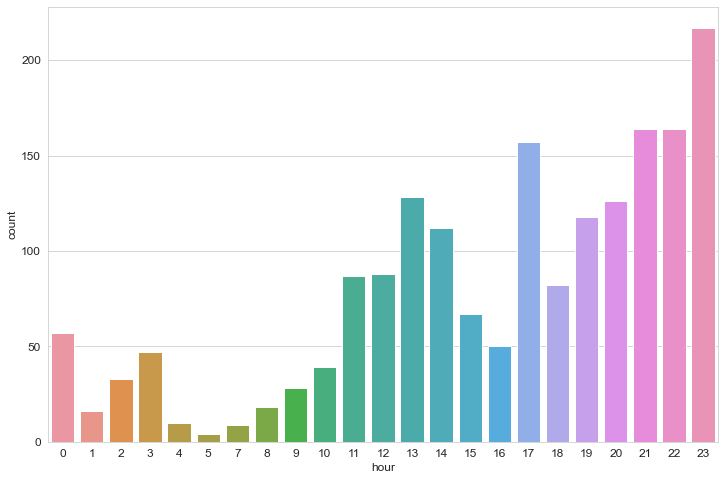

In [33]:
df7= df3.groupby("user")["message"].count().sort_values(ascending=False)
df7.head(2)
df8 = df3[df3['user'] == 'Dheeraj Lalwani (TSEC, CS)']
sns.countplot(x='hour', data=df8);

We see a minima between 1am to 9 am. But there is a maxima at 3 am too. It seems, that Dheeraj has distirbed sleeping pattern. He either gets awake in the between or sometimes sleeps very lately as 4 am. Also, the number of messages decrease from 12 am, it seems that this time is rather unproductive (in terms of whatsapp usage) as he might feel sleepy after 12 am.

Now, we found some patterns in the data, but what might be the reason of this particular pattern?

First of all this is comman to most teenagers in the world who are in this age group. Why? This is because teenagers feel most productive in their night as they don't have classes in the evening and all the formalities have been completed by then. So, they try to fit the maxmimum amount of work or socializing in the night. And they wake late as they need to sleep atleast 7 - 8 hours a day to work effeciently throughout the day. 

A maximum in between indicates disturbed sleep. This may be because of many bad habits that students acquire during their college time. They try to fit everthing in a night before their exams, complete assignments in the night or just bingewatch with freinds in the night.

Also, one important assumption that I have considered here is that people would be texting whenever they are awake. But this might not be true for all.

***

## 9. Finding The Owls

Here I assume that whoever are awake and texting in between 1 am and 5 am can denoted as owl, or the persons who like working in night. I apologize if this someone gets hurt by this comment. I didn't mean it. I used the term owl just for fun.

In [34]:
df8 = df3[df3.hour>=1]
df9=df8[df3.hour<=5]

C:\Users\Rahil\AppData\Local\Temp\ipykernel_10500\3765279936.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df9=df8[df3.hour<=5]


In [35]:
df9.user.unique()

array(['Tanay Kamath (TSEC, CS)', '+91 70394 60876',
       'Darshan Rander (TSEC, IT)', '+91 89764 07509',
       'Dheeraj Lalwani (TSEC, CS)', 'group_notification',
       'Harsh Kapadia (TSEC IT, SE)', 'Shreya (TSEC, IT)',
       '+91 99201 75875', 'Tushar Nankani', 'Farhan Irani (TSEC IT, SE)',
       '+91 95949 08570', 'Pratik K (TSEC CS, SE)',
       'Saurav Upoor (TSEC CS, SE)', '+91 86559 19035', '+91 98192 22032',
       'Kartik Soneji (TSEC, CS)', '+91 94208 78848',
       'Rishab Saini (TSEC CS, TE)', '+91 70208 31915',
       'Rohit Pathak (TSEC, CS)', '+91 88282 22720', '+91 77150 51136',
       '+91 97681 67131', '+91 98333 66146', '+91 99302 21772',
       '+91 73043 57388', 'Saket (TSEC, CS)', '+91 98198 16330',
       '+91 77158 99478', '+91 99693 94098', '+91 80979 84068',
       'Shubham Chettiar (TSEC CS, TE)', '+91 98337 47258',
       '+91 97694 89970', '+91 99676 84479', '+91 98709 38217',
       '+91 73032 50500'], dtype=object)

There are quite a few people who have been awake in the late night. Let's count their numbers

In [36]:
len(df9.user.unique())

38

So, there are total 38 people in the group who have texted in late night

This is a situation where one needs to think of setting a limit to the social media usage time. As chatting till late nights without knowing of the time decreases their sleep time and further detoriates their health.

***

## 10. Most Common Words

In [37]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# removed group_notifications like 'joined', 'deleted';
# removed really common words like "yeah" and "okay".
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])


# iterate through the DataFrame.
for val in df3.message.values:
    
    # typecaste each val to string.
    val = str(val) 
    
    # split the value.
    tokens = val.split() 
    
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 

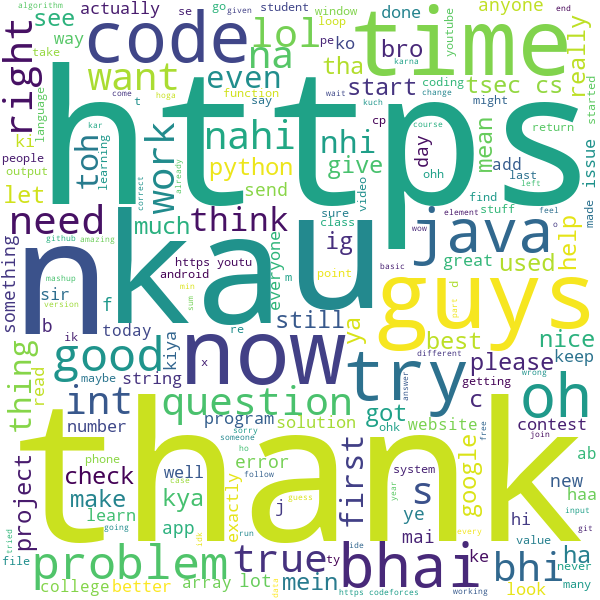

In [38]:
wordcloud.to_image()

So, we find that the most common words used here are **https, thank, time..**

**https** indicates that a lot of links to webspages have been shared on this group.

**Thank** indicates people are very helpful to each other. And they always say thanks in response to the help that they have been offered. This indicates that people in the group are **well mannered**.

**Time** indicates that people here do care about time and schedule their activities and work according to it.

Some other insights also follow from the other common words as well.

***

## 11. Conclusion

- The insights here are quite intresting to look at!
- We can conclude that most of the people in the group sleep late.
- We also discuss about disturbed sleep issues that students are facing today.
- We concluded that people in the group are well mannered and help each other very much.

Overall we discussed about the frequency of messages, most active days, most active users, most active hours, sleep cycle of people and derived deep insights from each one of them.

It was fun analzing the data and hope you also enjoyed reading it. Thanks for reading till the end

## 12. What next

- Sentiment analysis of the text message can be applied to this same whatsapp data
- Analysis of google search history
- Analysis of instagram data

These all are the data points that we daily generate without knowing the insights that it has to offer about ourselves, our friends, and our use of internet. 

These type of analysis do make us aware about what we are doing and what where we need to improve.

Ending with a beatiful statement given by james clear in his book **atomic habits**, **"1% better everyday will make you 37 times better after a year"**

***